# Sparse Representations with Activity Regularization

Deep learning models are capable of automatically learning a rich internal representation from raw input data. This is called feature or representation learning. Better learned representations, in turn, can lead to better insights into the domain, e.g., via visualization of learned features, and to better predictive models that make use of the learned features. A problem with learned features is that they can be too specialized to the training data or overfit and not generalize well to new examples. Large values in the learned representation can be a sign of the representation being overfitted. Activity or representation regularization provides a technique to encourage the learned representations, the output or activation of the hidden layer or layers of the network, to stay small and sparse. In this tutorial, you will discover activation regularization to improve the generalization of learned features in neural networks. After reading this tutorial, you will know:

* Neural networks learn features from data and models, such as autoencoders and encoder-decoder models, and explicitly seek effective learned representations.
* Similar to weights, large values in learned features, e.g., large activations, may indicate an overfit model.
* Adding penalties to the loss function that penalizes a model in proportion to the magnitude of the activations may result in more robust and generalized learned features.

## Activity Regularization

In this section, you will discover the problem with neural networks with large activity, a technique that you can use to encourage the development of models with a sparse activity called activity regularization, and tips for using this technique in your projects.

### Problem With Learned Features

Deep learning models can perform feature learning. The model will automatically extract the salient features from the input patterns or learn features during the network training. These features may be used in the network to predict a quantity for regression or a class value for classification. The output of a hidden layer within the network represents the model's learned features at that point. These internal representations are tangible things.

A field of study focused on the efficient and effective automatic learning of features, often investigated by having a network reduce input to a small learned feature before using a second network to reconstruct the original input from the learned feature. Models of this type are called auto-encoders, or encoder-decoders, and their learned features can be useful to learn more about the domain (e.g., via visualization) and in predictive models. The learned features, or encoded inputs, must be large enough to capture the salient features of the input but also focused enough to not overfit the specific examples in the training dataset. As such, there is a tension between the expressiveness and the generalization of the learned features.

In the same way, large weights in the network can signify an unstable and overfit model, large output values in the learned features can signify the same problems. It is desirable to have small values in the learned features, e.g., small outputs or activations from the encoder network.

### Encourage Small Activations

The loss function of the network can be updated to penalize models in proportion to the magnitude of their activation. This is similar to weight regularization, where the loss function is updated to penalize the model in proportion to the magnitude of the weights. The output of a layer is referred to as its activation or activity, as such, this form of penalty or regularization is referred to as activation regularization or activity regularization.

The output of an encoder or, generally, the output of a hidden layer in a neural network may represent the problem at that point in the model. As such, this type of penalty may also be referred to as representation regularization. The desire to have small or very few activations with mostly zero values is also called a desire for sparsity. As such, this type of penalty is also referred to as sparse feature learning. The encouragement of sparse learned features in autoencoder models is referred to as sparse autoencoder.

Sparsity is most commonly sought when a larger-than-required hidden layer (e.g., over-complete) is used to learn features that may encourage overfitting. A sparse overcomplete learned feature is more effective than other learned features offering better robustness to noise and even transforms in the input, e.g., learned features of images may have improved invariance to the position of objects in the image. The introduction of a sparsity penalty counters this problem and encourages better generalization.

There is a general focus on the sparsity of the representations rather than small vector magnitudes. A study of these representations that is more general than neural networks is known as sparse coding.

### How to Encourage Small Activations

An activation penalty can be applied per-layer, perhaps only at one layer that focuses on the learned representation, such as the output of the encoder model or the middle (bottleneck) of an autoencoder model. A constraint can be applied that adds a penalty proportional to the magnitude of the vector output of the layer. The activation values may be positive or negative, so we cannot simply sum the values. Two common methods for calculating the magnitude of the activation are:

* Sum of the absolute activation values, called L1 vector norm.
* Sum of the squared activation values, called the L2 vector norm.

The L1 norm encourages sparsity, e.g., allowing some activations to become zero, whereas the L2 norm generally encourages small activations values. Use of the L1 norm may be a more commonly used penalty for activation regularization. A hyperparameter must be specified that indicates the amount or degree that the loss function will weigh or pay attention to the penalty. Common values are on a logarithmic scale between 0 and 0.1, such as 0.1, 0.001, 0.0001, etc. Activity regularization can be used in conjunction with other regularization techniques, such as weight regularization.

### Tips for Using Activation Regularization

This section provides some tips for using activation regularization with your neural network.

**Use With All Network Types**

Activation regularization is a generic approach. It can be used with most, perhaps all, types of neural network models, not least the most common network types of Multilayer Perceptrons, Convolutional Neural Networks, and Long Short-Term Memory Recurrent Neural Networks.

**Use With Autoencoders and Encoder-Decoders**

Activity regularization may be best suited to those model types that explicitly seek an efficient learned representation. These include autoencoders (i.e., sparse autoencoders) and encoder-decoder models, such as encoder-decoder LSTMs used for sequence-to-sequence prediction problems.

**Experiment With Different Norms**

The most common activation regularization is the L1 norm, as it encourages sparsity. Experiment with other types of regularization such as the L2 norm or using both the L1 and L2 norms simultaneously, e.g., the Elastic Net linear regression algorithm.

**Use Rectified Linear Activation**

The rectified linear activation function, also called relu, is an activation function that is now widely used in the hidden layer of deep neural networks. Unlike classical activation functions such as tanh (hyperbolic tangent function) and sigmoid (logistic function), the relu function easily allows exact zero values. This makes it a good candidate when learning sparse representations, such as with the L1 vector norm activation regularization.

**Grid Search Parameters**

It is common to use small values for the regularization hyperparameter that controls the contribution of each activation to the penalty. Perhaps start by testing values on a log scale, such as 0.1, 0.001, and 0.0001. Then use a grid search at the order of magnitude that shows the most promise.

**Standardize Input Data**

It is a generally good practice to rescale input variables to have the same scale. When input variables have different scales, the scale of the network's weights will, in turn, vary accordingly. Large weights can saturate the nonlinear transfer function and reduce the variance in the output from the layer. This may introduce a problem when using activation regularization. This problem can be addressed by either normalizing or standardizing input variables.

**Use an Overcomplete Representation**

Configure the layer chosen to be the learned features, e.g., the output of the encoder or the bottleneck in the autoencoder, to have more nodes that may be required. This is called an overcomplete representation that will encourage the network to overfit the training examples. This can be countered with a strong activation regularization to encourage a rich, learned representation that is also sparse.

## Activity Regularization Case Study

In this section, we will demonstrate how to use activity regularization to reduce the overfitting of an MLP on a simple binary classification problem.  Although activity regularization is most often used to encourage sparse learned representations in autoencoder and encoder-decoder models, it can also be used directly within normal neural networks to achieve the same effect and improve the model's generalization. This example provides a template for applying activity regularization to your neural network for classification and regression problems.

### Binary Classification Problem

We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations: one circle for each class. Each observation has two input variables with the same scale and a class output value of 0 or 1. This dataset is called the `circles` dataset because of the shape of the observations in each class when plotted. We can use the `make_circles()` function to generate observations from this problem. We will add noise to the data and seed the random number generator to generate the same samples each time the code is run.

```
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
```

We can plot the dataset where the two variables are taken as `x` and `y` coordinates on a graph, and the class value is taken as the color of the observation. The complete example of generating the dataset and plotting it is listed below.

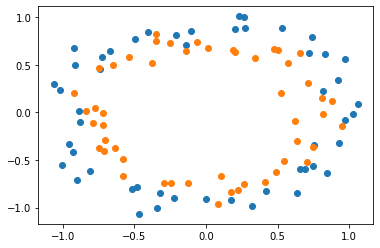

In [1]:
# scatter plot of moons dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# scatter plot for each class value
for class_value in range(2):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show plot
pyplot.show()

Running the example creates a scatter plot showing the concentric circles shape of the observations in each class. We can see the noise in the dispersal of the points, making the circles less obvious.

This is a good test problem because a line cannot separate the classes, e.g., are not linearly separable, requiring a nonlinear method such as a neural network to address. We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have a higher error on the test dataset: a good case for using regularization. Further, the samples have noise, allowing the model to learn aspects of the samples that do not generalize.

### Overfit Multilayer Perceptron Model

We can develop an MLP model to address this binary classification problem. The model will have one hidden layer with more nodes that may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits. Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model's performance.

In [2]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we can define the model. The model uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer to predict class values of 0 or 1. The model is optimized using the binary cross-entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [3]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32. We will use the test set as the validation dataset to get an idea of the model performance on a holdout dataset during training.

In [4]:
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=1)

Epoch 1/4000
1/1 [==============================] - 1s 838ms/step - loss: 0.6959 - accuracy: 0.6000 - val_loss: 0.6928 - val_accuracy: 0.4857
Epoch 2/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.6925 - accuracy: 0.5667 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 3/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6894 - accuracy: 0.5667 - val_loss: 0.6958 - val_accuracy: 0.5143
Epoch 4/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6864 - accuracy: 0.5667 - val_loss: 0.6973 - val_accuracy: 0.5286
Epoch 5/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6835 - accuracy: 0.5333 - val_loss: 0.6990 - val_accuracy: 0.5143
Epoch 6/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6808 - accuracy: 0.5333 - val_loss: 0.7007 - val_accuracy: 0.5143
Epoch 7/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6782 - accuracy: 0.5333 - val_loss: 0.7024 - val_accuracy: 0.5000
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6029 - accuracy: 0.6667 - val_loss: 0.7588 - val_accuracy: 0.4714
Epoch 60/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6019 - accuracy: 0.6667 - val_loss: 0.7590 - val_accuracy: 0.4571
Epoch 61/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6008 - accuracy: 0.6667 - val_loss: 0.7591 - val_accuracy: 0.4571
Epoch 62/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5997 - accuracy: 0.6667 - val_loss: 0.7593 - val_accuracy: 0.4571
Epoch 63/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5987 - accuracy: 0.6667 - val_loss: 0.7594 - val_accuracy: 0.4571
Epoch 64/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5976 - accuracy: 0.6667 - val_loss: 0.7596 - val_accuracy: 0.4571
Epoch 65/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5965 - accuracy: 0.6667 - val_loss: 0.7597 - val_accuracy: 0.4571
Epoch 

1/1 [==============================] - 0s 22ms/step - loss: 0.5404 - accuracy: 0.7333 - val_loss: 0.7510 - val_accuracy: 0.4857
Epoch 117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5393 - accuracy: 0.7333 - val_loss: 0.7503 - val_accuracy: 0.4857
Epoch 118/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5381 - accuracy: 0.7333 - val_loss: 0.7496 - val_accuracy: 0.4857
Epoch 119/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5370 - accuracy: 0.7333 - val_loss: 0.7489 - val_accuracy: 0.5000
Epoch 120/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5358 - accuracy: 0.7333 - val_loss: 0.7482 - val_accuracy: 0.5000
Epoch 121/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5347 - accuracy: 0.7333 - val_loss: 0.7475 - val_accuracy: 0.5000
Epoch 122/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5335 - accuracy: 0.7333 - val_loss: 0.7469 - val_accuracy: 0.5000
Epoch 123/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4714 - accuracy: 0.8000 - val_loss: 0.6983 - val_accuracy: 0.5857
Epoch 174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4702 - accuracy: 0.8000 - val_loss: 0.6972 - val_accuracy: 0.5857
Epoch 175/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4689 - accuracy: 0.8000 - val_loss: 0.6961 - val_accuracy: 0.5857
Epoch 176/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.4677 - accuracy: 0.8000 - val_loss: 0.6948 - val_accuracy: 0.5857
Epoch 177/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4665 - accuracy: 0.8000 - val_loss: 0.6935 - val_accuracy: 0.5857
Epoch 178/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4653 - accuracy: 0.8000 - val_loss: 0.6921 - val_accuracy: 0.5857
Epoch 179/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4641 - accuracy: 0.8000 - val_loss: 0.6908 - val_accuracy: 0.5857
Epoch 180/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4021 - accuracy: 0.8333 - val_loss: 0.6213 - val_accuracy: 0.6429
Epoch 231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4009 - accuracy: 0.8333 - val_loss: 0.6198 - val_accuracy: 0.6429
Epoch 232/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3996 - accuracy: 0.8333 - val_loss: 0.6183 - val_accuracy: 0.6429
Epoch 233/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3984 - accuracy: 0.8333 - val_loss: 0.6168 - val_accuracy: 0.6429
Epoch 234/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3972 - accuracy: 0.8333 - val_loss: 0.6153 - val_accuracy: 0.6429
Epoch 235/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3960 - accuracy: 0.8333 - val_loss: 0.6139 - val_accuracy: 0.6429
Epoch 236/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3948 - accuracy: 0.8333 - val_loss: 0.6125 - val_accuracy: 0.6429
Epoch 237/4000

1/1 [==============================] - 0s 27ms/step - loss: 0.3341 - accuracy: 0.8667 - val_loss: 0.5451 - val_accuracy: 0.7000
Epoch 288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3330 - accuracy: 0.8667 - val_loss: 0.5440 - val_accuracy: 0.7000
Epoch 289/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3319 - accuracy: 0.8667 - val_loss: 0.5428 - val_accuracy: 0.7000
Epoch 290/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3308 - accuracy: 0.8667 - val_loss: 0.5417 - val_accuracy: 0.7000
Epoch 291/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3297 - accuracy: 0.8667 - val_loss: 0.5407 - val_accuracy: 0.7143
Epoch 292/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3286 - accuracy: 0.8667 - val_loss: 0.5397 - val_accuracy: 0.7143
Epoch 293/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3275 - accuracy: 0.8667 - val_loss: 0.5386 - val_accuracy: 0.7143
Epoch 294/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.2771 - accuracy: 0.9333 - val_loss: 0.4903 - val_accuracy: 0.7429
Epoch 345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2762 - accuracy: 0.9333 - val_loss: 0.4896 - val_accuracy: 0.7429
Epoch 346/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2753 - accuracy: 0.9667 - val_loss: 0.4888 - val_accuracy: 0.7429
Epoch 347/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2745 - accuracy: 0.9667 - val_loss: 0.4881 - val_accuracy: 0.7429
Epoch 348/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2736 - accuracy: 0.9667 - val_loss: 0.4873 - val_accuracy: 0.7429
Epoch 349/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2727 - accuracy: 0.9667 - val_loss: 0.4865 - val_accuracy: 0.7429
Epoch 350/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2718 - accuracy: 0.9667 - val_loss: 0.4858 - val_accuracy: 0.7429
Epoch 351/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2314 - accuracy: 0.9667 - val_loss: 0.4557 - val_accuracy: 0.7714
Epoch 402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2307 - accuracy: 0.9667 - val_loss: 0.4552 - val_accuracy: 0.7714
Epoch 403/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2300 - accuracy: 0.9667 - val_loss: 0.4548 - val_accuracy: 0.7714
Epoch 404/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2293 - accuracy: 0.9667 - val_loss: 0.4544 - val_accuracy: 0.7714
Epoch 405/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.2286 - accuracy: 0.9667 - val_loss: 0.4542 - val_accuracy: 0.7714
Epoch 406/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2279 - accuracy: 0.9667 - val_loss: 0.4540 - val_accuracy: 0.7714
Epoch 407/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2272 - accuracy: 0.9667 - val_loss: 0.4538 - val_accuracy: 0.7714
Epoch 408/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1965 - accuracy: 0.9667 - val_loss: 0.4445 - val_accuracy: 0.8000
Epoch 459/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1960 - accuracy: 0.9667 - val_loss: 0.4445 - val_accuracy: 0.8000
Epoch 460/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1954 - accuracy: 0.9667 - val_loss: 0.4445 - val_accuracy: 0.8000
Epoch 461/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1949 - accuracy: 0.9667 - val_loss: 0.4446 - val_accuracy: 0.8000
Epoch 462/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1944 - accuracy: 0.9667 - val_loss: 0.4447 - val_accuracy: 0.8000
Epoch 463/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1939 - accuracy: 0.9667 - val_loss: 0.4447 - val_accuracy: 0.8000
Epoch 464/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1933 - accuracy: 0.9667 - val_loss: 0.4447 - val_accuracy: 0.8000
Epoch 465/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1700 - accuracy: 0.9667 - val_loss: 0.4473 - val_accuracy: 0.8000
Epoch 516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1696 - accuracy: 0.9667 - val_loss: 0.4474 - val_accuracy: 0.8000
Epoch 517/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1692 - accuracy: 0.9667 - val_loss: 0.4477 - val_accuracy: 0.8000
Epoch 518/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1688 - accuracy: 0.9667 - val_loss: 0.4479 - val_accuracy: 0.8000
Epoch 519/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1684 - accuracy: 0.9667 - val_loss: 0.4481 - val_accuracy: 0.8000
Epoch 520/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1680 - accuracy: 0.9667 - val_loss: 0.4481 - val_accuracy: 0.8000
Epoch 521/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1676 - accuracy: 0.9667 - val_loss: 0.4481 - val_accuracy: 0.8000
Epoch 522/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1496 - accuracy: 0.9667 - val_loss: 0.4527 - val_accuracy: 0.8000
Epoch 573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1493 - accuracy: 0.9667 - val_loss: 0.4529 - val_accuracy: 0.8000
Epoch 574/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1490 - accuracy: 0.9667 - val_loss: 0.4530 - val_accuracy: 0.8000
Epoch 575/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1487 - accuracy: 0.9667 - val_loss: 0.4530 - val_accuracy: 0.8000
Epoch 576/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1484 - accuracy: 0.9667 - val_loss: 0.4531 - val_accuracy: 0.8000
Epoch 577/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1481 - accuracy: 0.9667 - val_loss: 0.4534 - val_accuracy: 0.8000
Epoch 578/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1478 - accuracy: 0.9667 - val_loss: 0.4536 - val_accuracy: 0.8000
Epoch 579/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1335 - accuracy: 0.9667 - val_loss: 0.4599 - val_accuracy: 0.8000
Epoch 630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1333 - accuracy: 0.9667 - val_loss: 0.4600 - val_accuracy: 0.8000
Epoch 631/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1331 - accuracy: 0.9667 - val_loss: 0.4602 - val_accuracy: 0.8000
Epoch 632/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1328 - accuracy: 0.9667 - val_loss: 0.4604 - val_accuracy: 0.8000
Epoch 633/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1326 - accuracy: 0.9667 - val_loss: 0.4607 - val_accuracy: 0.8000
Epoch 634/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1323 - accuracy: 0.9667 - val_loss: 0.4609 - val_accuracy: 0.8000
Epoch 635/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1320 - accuracy: 0.9667 - val_loss: 0.4610 - val_accuracy: 0.8000
Epoch 636/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1206 - accuracy: 0.9667 - val_loss: 0.4683 - val_accuracy: 0.8286
Epoch 687/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1204 - accuracy: 0.9667 - val_loss: 0.4685 - val_accuracy: 0.8286
Epoch 688/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1202 - accuracy: 0.9667 - val_loss: 0.4687 - val_accuracy: 0.8286
Epoch 689/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1200 - accuracy: 0.9667 - val_loss: 0.4689 - val_accuracy: 0.8286
Epoch 690/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1198 - accuracy: 0.9667 - val_loss: 0.4690 - val_accuracy: 0.8286
Epoch 691/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1196 - accuracy: 0.9667 - val_loss: 0.4693 - val_accuracy: 0.8286
Epoch 692/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1194 - accuracy: 0.9667 - val_loss: 0.4695 - val_accuracy: 0.8286
Epoch 693/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1099 - accuracy: 0.9667 - val_loss: 0.4761 - val_accuracy: 0.8286
Epoch 744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1097 - accuracy: 0.9667 - val_loss: 0.4763 - val_accuracy: 0.8286
Epoch 745/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1095 - accuracy: 0.9667 - val_loss: 0.4764 - val_accuracy: 0.8286
Epoch 746/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1094 - accuracy: 0.9667 - val_loss: 0.4765 - val_accuracy: 0.8286
Epoch 747/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1092 - accuracy: 0.9667 - val_loss: 0.4767 - val_accuracy: 0.8286
Epoch 748/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1090 - accuracy: 0.9667 - val_loss: 0.4769 - val_accuracy: 0.8286
Epoch 749/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1088 - accuracy: 0.9667 - val_loss: 0.4772 - val_accuracy: 0.8429
Epoch 750/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1008 - accuracy: 0.9667 - val_loss: 0.4872 - val_accuracy: 0.8429
Epoch 801/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1006 - accuracy: 0.9667 - val_loss: 0.4875 - val_accuracy: 0.8429
Epoch 802/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1005 - accuracy: 0.9667 - val_loss: 0.4877 - val_accuracy: 0.8429
Epoch 803/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1003 - accuracy: 0.9667 - val_loss: 0.4880 - val_accuracy: 0.8429
Epoch 804/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1002 - accuracy: 0.9667 - val_loss: 0.4883 - val_accuracy: 0.8429
Epoch 805/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1000 - accuracy: 0.9667 - val_loss: 0.4885 - val_accuracy: 0.8429
Epoch 806/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0999 - accuracy: 0.9667 - val_loss: 0.4888 - val_accuracy: 0.8429
Epoch 807/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0929 - accuracy: 0.9667 - val_loss: 0.5054 - val_accuracy: 0.8571
Epoch 858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0928 - accuracy: 0.9667 - val_loss: 0.5056 - val_accuracy: 0.8571
Epoch 859/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0927 - accuracy: 0.9667 - val_loss: 0.5059 - val_accuracy: 0.8571
Epoch 860/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0925 - accuracy: 0.9667 - val_loss: 0.5063 - val_accuracy: 0.8571
Epoch 861/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0924 - accuracy: 0.9667 - val_loss: 0.5067 - val_accuracy: 0.8571
Epoch 862/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0923 - accuracy: 0.9667 - val_loss: 0.5071 - val_accuracy: 0.8571
Epoch 863/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0922 - accuracy: 0.9667 - val_loss: 0.5074 - val_accuracy: 0.8571
Epoch 864/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0860 - accuracy: 0.9667 - val_loss: 0.5271 - val_accuracy: 0.8429
Epoch 915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0859 - accuracy: 0.9667 - val_loss: 0.5274 - val_accuracy: 0.8429
Epoch 916/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0858 - accuracy: 0.9667 - val_loss: 0.5278 - val_accuracy: 0.8429
Epoch 917/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0857 - accuracy: 0.9667 - val_loss: 0.5281 - val_accuracy: 0.8429
Epoch 918/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0856 - accuracy: 0.9667 - val_loss: 0.5283 - val_accuracy: 0.8429
Epoch 919/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0855 - accuracy: 0.9667 - val_loss: 0.5286 - val_accuracy: 0.8429
Epoch 920/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0853 - accuracy: 0.9667 - val_loss: 0.5290 - val_accuracy: 0.8429
Epoch 921/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0797 - accuracy: 1.0000 - val_loss: 0.5490 - val_accuracy: 0.8429
Epoch 972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0796 - accuracy: 1.0000 - val_loss: 0.5494 - val_accuracy: 0.8429
Epoch 973/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0795 - accuracy: 1.0000 - val_loss: 0.5496 - val_accuracy: 0.8429
Epoch 974/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0794 - accuracy: 1.0000 - val_loss: 0.5499 - val_accuracy: 0.8429
Epoch 975/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0793 - accuracy: 1.0000 - val_loss: 0.5504 - val_accuracy: 0.8429
Epoch 976/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0792 - accuracy: 1.0000 - val_loss: 0.5509 - val_accuracy: 0.8429
Epoch 977/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0791 - accuracy: 1.0000 - val_loss: 0.5513 - val_accuracy: 0.8429
Epoch 978/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0738 - accuracy: 1.0000 - val_loss: 0.5720 - val_accuracy: 0.8429
Epoch 1029/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0737 - accuracy: 1.0000 - val_loss: 0.5722 - val_accuracy: 0.8429
Epoch 1030/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0736 - accuracy: 1.0000 - val_loss: 0.5724 - val_accuracy: 0.8429
Epoch 1031/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0734 - accuracy: 1.0000 - val_loss: 0.5729 - val_accuracy: 0.8429
Epoch 1032/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0733 - accuracy: 1.0000 - val_loss: 0.5734 - val_accuracy: 0.8429
Epoch 1033/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0732 - accuracy: 1.0000 - val_loss: 0.5739 - val_accuracy: 0.8429
Epoch 1034/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0731 - accuracy: 1.0000 - val_loss: 0.5744 - val_accuracy: 0.8429
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.0666 - accuracy: 1.0000 - val_loss: 0.6032 - val_accuracy: 0.8429
Epoch 1086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0665 - accuracy: 1.0000 - val_loss: 0.6037 - val_accuracy: 0.8429
Epoch 1087/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0664 - accuracy: 1.0000 - val_loss: 0.6043 - val_accuracy: 0.8429
Epoch 1088/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0663 - accuracy: 1.0000 - val_loss: 0.6049 - val_accuracy: 0.8429
Epoch 1089/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0662 - accuracy: 1.0000 - val_loss: 0.6055 - val_accuracy: 0.8429
Epoch 1090/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0661 - accuracy: 1.0000 - val_loss: 0.6064 - val_accuracy: 0.8286
Epoch 1091/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0659 - accuracy: 1.0000 - val_loss: 0.6074 - val_accuracy: 0.8286
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.0607 - accuracy: 1.0000 - val_loss: 0.6489 - val_accuracy: 0.8286
Epoch 1143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0606 - accuracy: 1.0000 - val_loss: 0.6500 - val_accuracy: 0.8286
Epoch 1144/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0605 - accuracy: 1.0000 - val_loss: 0.6510 - val_accuracy: 0.8143
Epoch 1145/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0604 - accuracy: 1.0000 - val_loss: 0.6518 - val_accuracy: 0.8143
Epoch 1146/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0603 - accuracy: 1.0000 - val_loss: 0.6526 - val_accuracy: 0.8143
Epoch 1147/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0602 - accuracy: 1.0000 - val_loss: 0.6534 - val_accuracy: 0.8143
Epoch 1148/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0601 - accuracy: 1.0000 - val_loss: 0.6541 - val_accuracy: 0.8143
Epoch 11

1/1 [==============================] - 0s 22ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 0.6979 - val_accuracy: 0.8000
Epoch 1200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 0.6986 - val_accuracy: 0.8000
Epoch 1201/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 0.6995 - val_accuracy: 0.8000
Epoch 1202/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0551 - accuracy: 1.0000 - val_loss: 0.7005 - val_accuracy: 0.8000
Epoch 1203/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0550 - accuracy: 1.0000 - val_loss: 0.7015 - val_accuracy: 0.8000
Epoch 1204/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0549 - accuracy: 1.0000 - val_loss: 0.7023 - val_accuracy: 0.8000
Epoch 1205/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0548 - accuracy: 1.0000 - val_loss: 0.7032 - val_accuracy: 0.8000
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.0504 - accuracy: 1.0000 - val_loss: 0.7479 - val_accuracy: 0.8000
Epoch 1257/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0504 - accuracy: 1.0000 - val_loss: 0.7489 - val_accuracy: 0.8000
Epoch 1258/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0503 - accuracy: 1.0000 - val_loss: 0.7497 - val_accuracy: 0.8000
Epoch 1259/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0502 - accuracy: 1.0000 - val_loss: 0.7505 - val_accuracy: 0.8000
Epoch 1260/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0501 - accuracy: 1.0000 - val_loss: 0.7515 - val_accuracy: 0.8000
Epoch 1261/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 0.7525 - val_accuracy: 0.8000
Epoch 1262/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0499 - accuracy: 1.0000 - val_loss: 0.7534 - val_accuracy: 0.8000
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 0.7991 - val_accuracy: 0.7857
Epoch 1314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 0.7999 - val_accuracy: 0.7857
Epoch 1315/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 0.8007 - val_accuracy: 0.7857
Epoch 1316/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 0.8015 - val_accuracy: 0.7857
Epoch 1317/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 0.8023 - val_accuracy: 0.7857
Epoch 1318/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 0.8032 - val_accuracy: 0.7857
Epoch 1319/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 0.8040 - val_accuracy: 0.7857
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.0417 - accuracy: 1.0000 - val_loss: 0.8497 - val_accuracy: 0.7857
Epoch 1371/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0417 - accuracy: 1.0000 - val_loss: 0.8506 - val_accuracy: 0.7857
Epoch 1372/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 0.8515 - val_accuracy: 0.7857
Epoch 1373/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.8524 - val_accuracy: 0.7857
Epoch 1374/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 0.8534 - val_accuracy: 0.7857
Epoch 1375/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 0.8544 - val_accuracy: 0.7857
Epoch 1376/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.8553 - val_accuracy: 0.7857
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.0379 - accuracy: 1.0000 - val_loss: 0.8994 - val_accuracy: 0.7857
Epoch 1428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.9003 - val_accuracy: 0.7857
Epoch 1429/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.9012 - val_accuracy: 0.7857
Epoch 1430/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.9020 - val_accuracy: 0.7857
Epoch 1431/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.9028 - val_accuracy: 0.7857
Epoch 1432/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 0.9036 - val_accuracy: 0.7857
Epoch 1433/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.9045 - val_accuracy: 0.7857
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.9473 - val_accuracy: 0.7857
Epoch 1485/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.9481 - val_accuracy: 0.7857
Epoch 1486/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.9489 - val_accuracy: 0.7857
Epoch 1487/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.9497 - val_accuracy: 0.7857
Epoch 1488/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.9506 - val_accuracy: 0.7857
Epoch 1489/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.9513 - val_accuracy: 0.7857
Epoch 1490/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 0.9520 - val_accuracy: 0.7857
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 0.9929 - val_accuracy: 0.7857
Epoch 1542/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 0.9935 - val_accuracy: 0.7857
Epoch 1543/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.9943 - val_accuracy: 0.7857
Epoch 1544/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.9951 - val_accuracy: 0.7857
Epoch 1545/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.9961 - val_accuracy: 0.7857
Epoch 1546/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.9971 - val_accuracy: 0.7857
Epoch 1547/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 0.9979 - val_accuracy: 0.7857
Epoch 15

1/1 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 1.0375 - val_accuracy: 0.7857
Epoch 1599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 1.0383 - val_accuracy: 0.7857
Epoch 1600/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 1.0390 - val_accuracy: 0.7857
Epoch 1601/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 1.0397 - val_accuracy: 0.7857
Epoch 1602/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 1.0403 - val_accuracy: 0.7857
Epoch 1603/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 1.0409 - val_accuracy: 0.7857
Epoch 1604/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 1.0416 - val_accuracy: 0.7857
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 1.0799 - val_accuracy: 0.7714
Epoch 1656/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 1.0805 - val_accuracy: 0.7857
Epoch 1657/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 1.0812 - val_accuracy: 0.7857
Epoch 1658/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 1.0821 - val_accuracy: 0.7857
Epoch 1659/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 1.0832 - val_accuracy: 0.7714
Epoch 1660/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 1.0840 - val_accuracy: 0.7714
Epoch 1661/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 1.0848 - val_accuracy: 0.7714
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 1.1224 - val_accuracy: 0.7571
Epoch 1713/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 1.1232 - val_accuracy: 0.7571
Epoch 1714/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 1.1239 - val_accuracy: 0.7571
Epoch 1715/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 1.1245 - val_accuracy: 0.7571
Epoch 1716/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 1.1250 - val_accuracy: 0.7571
Epoch 1717/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 1.1254 - val_accuracy: 0.7571
Epoch 1718/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 1.1261 - val_accuracy: 0.7571
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 1.1630 - val_accuracy: 0.7571
Epoch 1770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 1.1638 - val_accuracy: 0.7571
Epoch 1771/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 1.1646 - val_accuracy: 0.7571
Epoch 1772/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 1.1654 - val_accuracy: 0.7571
Epoch 1773/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 1.1660 - val_accuracy: 0.7571
Epoch 1774/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 1.1666 - val_accuracy: 0.7571
Epoch 1775/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 1.1672 - val_accuracy: 0.7571
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 1.2025 - val_accuracy: 0.7571
Epoch 1827/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 1.2031 - val_accuracy: 0.7571
Epoch 1828/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 1.2038 - val_accuracy: 0.7571
Epoch 1829/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 1.2043 - val_accuracy: 0.7571
Epoch 1830/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 1.2050 - val_accuracy: 0.7571
Epoch 1831/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 1.2057 - val_accuracy: 0.7571
Epoch 1832/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 1.2066 - val_accuracy: 0.7571
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 1.2399 - val_accuracy: 0.7571
Epoch 1884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 1.2406 - val_accuracy: 0.7571
Epoch 1885/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 1.2414 - val_accuracy: 0.7571
Epoch 1886/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 1.2421 - val_accuracy: 0.7571
Epoch 1887/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 1.2427 - val_accuracy: 0.7571
Epoch 1888/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 1.2432 - val_accuracy: 0.7571
Epoch 1889/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0183 - accuracy: 1.0000 - val_loss: 1.2438 - val_accuracy: 0.7571
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.2750 - val_accuracy: 0.7571
Epoch 1941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.2757 - val_accuracy: 0.7571
Epoch 1942/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.2764 - val_accuracy: 0.7571
Epoch 1943/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.2770 - val_accuracy: 0.7571
Epoch 1944/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 1.2777 - val_accuracy: 0.7571
Epoch 1945/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 1.2782 - val_accuracy: 0.7571
Epoch 1946/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 1.2788 - val_accuracy: 0.7571
Epoch 19

1/1 [==============================] - 0s 22ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.3086 - val_accuracy: 0.7571
Epoch 1998/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.3089 - val_accuracy: 0.7571
Epoch 1999/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 1.3095 - val_accuracy: 0.7571
Epoch 2000/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 1.3101 - val_accuracy: 0.7571
Epoch 2001/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 1.3109 - val_accuracy: 0.7571
Epoch 2002/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 1.3115 - val_accuracy: 0.7571
Epoch 2003/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 1.3122 - val_accuracy: 0.7571
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.3413 - val_accuracy: 0.7571
Epoch 2055/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.3420 - val_accuracy: 0.7571
Epoch 2056/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.3424 - val_accuracy: 0.7571
Epoch 2057/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.3426 - val_accuracy: 0.7571
Epoch 2058/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.3429 - val_accuracy: 0.7571
Epoch 2059/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.3435 - val_accuracy: 0.7571
Epoch 2060/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.3441 - val_accuracy: 0.7571
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.3722 - val_accuracy: 0.7571
Epoch 2112/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.3727 - val_accuracy: 0.7571
Epoch 2113/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.3732 - val_accuracy: 0.7571
Epoch 2114/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.3738 - val_accuracy: 0.7571
Epoch 2115/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.3744 - val_accuracy: 0.7571
Epoch 2116/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.3750 - val_accuracy: 0.7571
Epoch 2117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.3756 - val_accuracy: 0.7571
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.4032 - val_accuracy: 0.7571
Epoch 2169/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.4039 - val_accuracy: 0.7571
Epoch 2170/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.4045 - val_accuracy: 0.7571
Epoch 2171/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.4050 - val_accuracy: 0.7571
Epoch 2172/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.4052 - val_accuracy: 0.7571
Epoch 2173/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.4055 - val_accuracy: 0.7571
Epoch 2174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.4059 - val_accuracy: 0.7571
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.4329 - val_accuracy: 0.7571
Epoch 2226/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.4334 - val_accuracy: 0.7571
Epoch 2227/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.4339 - val_accuracy: 0.7571
Epoch 2228/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.4344 - val_accuracy: 0.7571
Epoch 2229/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.4350 - val_accuracy: 0.7571
Epoch 2230/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.4356 - val_accuracy: 0.7571
Epoch 2231/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.4362 - val_accuracy: 0.7571
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.4624 - val_accuracy: 0.7571
Epoch 2283/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.4630 - val_accuracy: 0.7571
Epoch 2284/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.4636 - val_accuracy: 0.7571
Epoch 2285/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.4642 - val_accuracy: 0.7571
Epoch 2286/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.4647 - val_accuracy: 0.7571
Epoch 2287/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.4652 - val_accuracy: 0.7571
Epoch 2288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.4657 - val_accuracy: 0.7571
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.4916 - val_accuracy: 0.7571
Epoch 2340/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.4920 - val_accuracy: 0.7571
Epoch 2341/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.4924 - val_accuracy: 0.7571
Epoch 2342/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.4929 - val_accuracy: 0.7571
Epoch 2343/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.4935 - val_accuracy: 0.7571
Epoch 2344/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.4940 - val_accuracy: 0.7571
Epoch 2345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.4945 - val_accuracy: 0.7571
Epoch 23

1/1 [==============================] - 0s 22ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.5200 - val_accuracy: 0.7571
Epoch 2397/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.5205 - val_accuracy: 0.7571
Epoch 2398/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.5210 - val_accuracy: 0.7571
Epoch 2399/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.5215 - val_accuracy: 0.7571
Epoch 2400/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.5220 - val_accuracy: 0.7571
Epoch 2401/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.5226 - val_accuracy: 0.7571
Epoch 2402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.5230 - val_accuracy: 0.7571
Epoch 24

1/1 [==============================] - 0s 22ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5478 - val_accuracy: 0.7571
Epoch 2454/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5483 - val_accuracy: 0.7571
Epoch 2455/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5488 - val_accuracy: 0.7571
Epoch 2456/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5493 - val_accuracy: 0.7571
Epoch 2457/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.5497 - val_accuracy: 0.7571
Epoch 2458/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.5503 - val_accuracy: 0.7571
Epoch 2459/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.5509 - val_accuracy: 0.7571
Epoch 24

1/1 [==============================] - 0s 23ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5751 - val_accuracy: 0.7571
Epoch 2511/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5758 - val_accuracy: 0.7571
Epoch 2512/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5764 - val_accuracy: 0.7571
Epoch 2513/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5768 - val_accuracy: 0.7571
Epoch 2514/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5772 - val_accuracy: 0.7571
Epoch 2515/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5776 - val_accuracy: 0.7571
Epoch 2516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.5779 - val_accuracy: 0.7571
Epoch 25

1/1 [==============================] - 0s 23ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.6016 - val_accuracy: 0.7571
Epoch 2568/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.6020 - val_accuracy: 0.7571
Epoch 2569/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.6025 - val_accuracy: 0.7571
Epoch 2570/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.6032 - val_accuracy: 0.7571
Epoch 2571/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.6038 - val_accuracy: 0.7571
Epoch 2572/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.6043 - val_accuracy: 0.7571
Epoch 2573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.6047 - val_accuracy: 0.7571
Epoch 25

1/1 [==============================] - 0s 23ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6280 - val_accuracy: 0.7571
Epoch 2625/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6284 - val_accuracy: 0.7571
Epoch 2626/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6287 - val_accuracy: 0.7571
Epoch 2627/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6291 - val_accuracy: 0.7571
Epoch 2628/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6296 - val_accuracy: 0.7571
Epoch 2629/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.6302 - val_accuracy: 0.7571
Epoch 2630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.6307 - val_accuracy: 0.7571
Epoch 26

1/1 [==============================] - 0s 23ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6536 - val_accuracy: 0.7571
Epoch 2682/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6540 - val_accuracy: 0.7571
Epoch 2683/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6545 - val_accuracy: 0.7571
Epoch 2684/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6549 - val_accuracy: 0.7571
Epoch 2685/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6555 - val_accuracy: 0.7571
Epoch 2686/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6559 - val_accuracy: 0.7571
Epoch 2687/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6563 - val_accuracy: 0.7571
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6783 - val_accuracy: 0.7571
Epoch 2739/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6787 - val_accuracy: 0.7571
Epoch 2740/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6793 - val_accuracy: 0.7571
Epoch 2741/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6798 - val_accuracy: 0.7571
Epoch 2742/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6804 - val_accuracy: 0.7571
Epoch 2743/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6808 - val_accuracy: 0.7571
Epoch 2744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6813 - val_accuracy: 0.7571
Epoch 27

1/1 [==============================] - 0s 22ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.7021 - val_accuracy: 0.7571
Epoch 2796/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.7025 - val_accuracy: 0.7571
Epoch 2797/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.7029 - val_accuracy: 0.7571
Epoch 2798/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.7033 - val_accuracy: 0.7571
Epoch 2799/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.7037 - val_accuracy: 0.7571
Epoch 2800/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.7039 - val_accuracy: 0.7571
Epoch 2801/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.7042 - val_accuracy: 0.7571
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7248 - val_accuracy: 0.7571
Epoch 2853/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7252 - val_accuracy: 0.7571
Epoch 2854/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7255 - val_accuracy: 0.7571
Epoch 2855/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7257 - val_accuracy: 0.7571
Epoch 2856/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7260 - val_accuracy: 0.7571
Epoch 2857/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7264 - val_accuracy: 0.7571
Epoch 2858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7270 - val_accuracy: 0.7571
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7465 - val_accuracy: 0.7571
Epoch 2910/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7468 - val_accuracy: 0.7571
Epoch 2911/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7471 - val_accuracy: 0.7571
Epoch 2912/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7475 - val_accuracy: 0.7571
Epoch 2913/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7478 - val_accuracy: 0.7571
Epoch 2914/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.7483 - val_accuracy: 0.7571
Epoch 2915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.7488 - val_accuracy: 0.7571
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7682 - val_accuracy: 0.7571
Epoch 2967/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7686 - val_accuracy: 0.7571
Epoch 2968/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7690 - val_accuracy: 0.7571
Epoch 2969/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7693 - val_accuracy: 0.7571
Epoch 2970/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7696 - val_accuracy: 0.7571
Epoch 2971/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.7700 - val_accuracy: 0.7571
Epoch 2972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.7703 - val_accuracy: 0.7571
Epoch 29

1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7894 - val_accuracy: 0.7571
Epoch 3024/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7897 - val_accuracy: 0.7571
Epoch 3025/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7901 - val_accuracy: 0.7571
Epoch 3026/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7905 - val_accuracy: 0.7571
Epoch 3027/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7909 - val_accuracy: 0.7571
Epoch 3028/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7913 - val_accuracy: 0.7571
Epoch 3029/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7916 - val_accuracy: 0.7571
Epoch 30

1/1 [==============================] - 0s 23ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8105 - val_accuracy: 0.7429
Epoch 3081/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8108 - val_accuracy: 0.7429
Epoch 3082/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8113 - val_accuracy: 0.7429
Epoch 3083/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8117 - val_accuracy: 0.7429
Epoch 3084/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8120 - val_accuracy: 0.7429
Epoch 3085/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8124 - val_accuracy: 0.7429
Epoch 3086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.8128 - val_accuracy: 0.7429
Epoch 30

1/1 [==============================] - 0s 23ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8315 - val_accuracy: 0.7429
Epoch 3138/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8321 - val_accuracy: 0.7429
Epoch 3139/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8325 - val_accuracy: 0.7429
Epoch 3140/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8329 - val_accuracy: 0.7429
Epoch 3141/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8332 - val_accuracy: 0.7429
Epoch 3142/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8335 - val_accuracy: 0.7429
Epoch 3143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8339 - val_accuracy: 0.7429
Epoch 31

1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8521 - val_accuracy: 0.7429
Epoch 3195/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8525 - val_accuracy: 0.7429
Epoch 3196/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8528 - val_accuracy: 0.7429
Epoch 3197/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8531 - val_accuracy: 0.7429
Epoch 3198/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8536 - val_accuracy: 0.7429
Epoch 3199/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8541 - val_accuracy: 0.7429
Epoch 3200/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.8545 - val_accuracy: 0.7429
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8725 - val_accuracy: 0.7429
Epoch 3252/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8728 - val_accuracy: 0.7429
Epoch 3253/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8732 - val_accuracy: 0.7429
Epoch 3254/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8735 - val_accuracy: 0.7429
Epoch 3255/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.8738 - val_accuracy: 0.7429
Epoch 3256/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.8742 - val_accuracy: 0.7429
Epoch 3257/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.8745 - val_accuracy: 0.7429
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8926 - val_accuracy: 0.7429
Epoch 3309/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8926 - val_accuracy: 0.7429
Epoch 3310/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8928 - val_accuracy: 0.7429
Epoch 3311/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8931 - val_accuracy: 0.7429
Epoch 3312/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8935 - val_accuracy: 0.7429
Epoch 3313/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8939 - val_accuracy: 0.7429
Epoch 3314/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.8943 - val_accuracy: 0.7429
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9118 - val_accuracy: 0.7429
Epoch 3366/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9122 - val_accuracy: 0.7429
Epoch 3367/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9126 - val_accuracy: 0.7429
Epoch 3368/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9129 - val_accuracy: 0.7429
Epoch 3369/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9132 - val_accuracy: 0.7429
Epoch 3370/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9136 - val_accuracy: 0.7429
Epoch 3371/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9140 - val_accuracy: 0.7429
Epoch 33

1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9314 - val_accuracy: 0.7429
Epoch 3423/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9316 - val_accuracy: 0.7429
Epoch 3424/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9319 - val_accuracy: 0.7429
Epoch 3425/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9321 - val_accuracy: 0.7429
Epoch 3426/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9324 - val_accuracy: 0.7429
Epoch 3427/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9327 - val_accuracy: 0.7429
Epoch 3428/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9330 - val_accuracy: 0.7429
Epoch 34

1/1 [==============================] - 0s 23ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9504 - val_accuracy: 0.7429
Epoch 3480/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9508 - val_accuracy: 0.7429
Epoch 3481/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9512 - val_accuracy: 0.7429
Epoch 3482/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9515 - val_accuracy: 0.7429
Epoch 3483/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.9518 - val_accuracy: 0.7429
Epoch 3484/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.9521 - val_accuracy: 0.7429
Epoch 3485/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.9524 - val_accuracy: 0.7429
Epoch 34

1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9692 - val_accuracy: 0.7571
Epoch 3537/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9696 - val_accuracy: 0.7571
Epoch 3538/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9700 - val_accuracy: 0.7571
Epoch 3539/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9704 - val_accuracy: 0.7571
Epoch 3540/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9707 - val_accuracy: 0.7571
Epoch 3541/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9710 - val_accuracy: 0.7571
Epoch 3542/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9712 - val_accuracy: 0.7571
Epoch 35

1/1 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9878 - val_accuracy: 0.7571
Epoch 3594/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9880 - val_accuracy: 0.7571
Epoch 3595/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9884 - val_accuracy: 0.7571
Epoch 3596/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9889 - val_accuracy: 0.7571
Epoch 3597/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9894 - val_accuracy: 0.7571
Epoch 3598/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9898 - val_accuracy: 0.7571
Epoch 3599/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9903 - val_accuracy: 0.7571
Epoch 36

1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0067 - val_accuracy: 0.7571
Epoch 3651/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0071 - val_accuracy: 0.7571
Epoch 3652/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0074 - val_accuracy: 0.7571
Epoch 3653/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0076 - val_accuracy: 0.7571
Epoch 3654/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0080 - val_accuracy: 0.7571
Epoch 3655/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0082 - val_accuracy: 0.7571
Epoch 3656/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0084 - val_accuracy: 0.7571
Epoch 36

1/1 [==============================] - 0s 23ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0248 - val_accuracy: 0.7571
Epoch 3708/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0251 - val_accuracy: 0.7571
Epoch 3709/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0254 - val_accuracy: 0.7571
Epoch 3710/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0259 - val_accuracy: 0.7571
Epoch 3711/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0263 - val_accuracy: 0.7571
Epoch 3712/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0266 - val_accuracy: 0.7571
Epoch 3713/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0268 - val_accuracy: 0.7571
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0434 - val_accuracy: 0.7571
Epoch 3765/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0436 - val_accuracy: 0.7571
Epoch 3766/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0437 - val_accuracy: 0.7571
Epoch 3767/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0440 - val_accuracy: 0.7571
Epoch 3768/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0443 - val_accuracy: 0.7571
Epoch 3769/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0447 - val_accuracy: 0.7571
Epoch 3770/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0452 - val_accuracy: 0.7571
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0618 - val_accuracy: 0.7571
Epoch 3822/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0621 - val_accuracy: 0.7571
Epoch 3823/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0624 - val_accuracy: 0.7571
Epoch 3824/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0626 - val_accuracy: 0.7571
Epoch 3825/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0627 - val_accuracy: 0.7571
Epoch 3826/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0630 - val_accuracy: 0.7571
Epoch 3827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0633 - val_accuracy: 0.7571
Epoch 38

1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0799 - val_accuracy: 0.7571
Epoch 3879/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0803 - val_accuracy: 0.7571
Epoch 3880/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0807 - val_accuracy: 0.7571
Epoch 3881/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0809 - val_accuracy: 0.7571
Epoch 3882/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0811 - val_accuracy: 0.7571
Epoch 3883/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0813 - val_accuracy: 0.7571
Epoch 3884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0815 - val_accuracy: 0.7571
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.0977 - val_accuracy: 0.7571
Epoch 3936/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.0980 - val_accuracy: 0.7571
Epoch 3937/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.0982 - val_accuracy: 0.7571
Epoch 3938/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.0986 - val_accuracy: 0.7571
Epoch 3939/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.0989 - val_accuracy: 0.7571
Epoch 3940/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.0992 - val_accuracy: 0.7571
Epoch 3941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.0996 - val_accuracy: 0.7571
Epoch 39

1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1157 - val_accuracy: 0.7571
Epoch 3993/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1160 - val_accuracy: 0.7571
Epoch 3994/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1162 - val_accuracy: 0.7571
Epoch 3995/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1165 - val_accuracy: 0.7571
Epoch 3996/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1167 - val_accuracy: 0.7571
Epoch 3997/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1170 - val_accuracy: 0.7571
Epoch 3998/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1173 - val_accuracy: 0.7571
Epoch 39

We can evaluate the performance of the model on the test dataset and report the result.

In [5]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.757


Finally, we will plot the model's performance on both the train and test set for each epoch. If the model does indeed overfit the training dataset, we would expect the line plot of cross-entropy loss and classification accuracy to show the pattern of overfitting. That is an improvement on both train and test sets until an inflection point, after which performance continues to improve for the train set and begins to get worse for the test set.

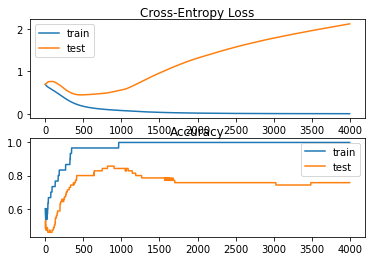

In [6]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

We can tie all of these pieces together; the complete example is listed below.

In [7]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.771


Running the example first reports the model performance on the train and test datasets. We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

A figure is created showing line plots of the model loss and accuracy on the train and test sets. We can see the expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again. The effect is even more dramatic with loss, showing a large increase in test set loss as training continues.

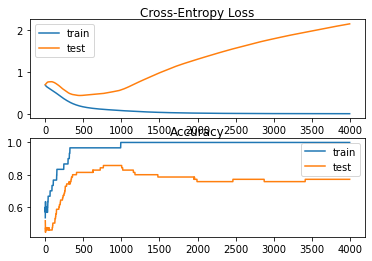

In [8]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### Overfit MLP With Activation Regularization

We can update the example to use activation regularization. There are a few different regularization methods, but it is probably a good idea to use the most common, the L1 vector norm. This regularization has the effect of encouraging a sparse representation (lots of zeros), which is supported by the rectified linear activation function that permits true zero values. We can do this by using the `keras.regularizers.l1` class in Keras.

We will configure the layer to use the linear activation function to regularize the raw outputs, then add a relu activation layer after the regularized outputs of the layer. We will set the regularization hyperparameter to 1E-4 or 0.0001, found with a bit of trial and error.

```
model.add(Dense(500, input_dim=2, activation='linear', activity_regularizer=l1(0.0001)))
model.add(Activation('relu'))
```

The complete updated example with the L1 norm constraint is listed below:

In [9]:
# mlp overfit on the two circles dataset with activation regularization before activation
from sklearn.datasets import make_circles
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='linear', activity_regularizer=l1(0.0001)))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.757


Running the example reports the model performance on the train and test datasets.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that activity regularization resulted in a slight drop in accuracy.

Reviewing the line plot of train and test accuracy, we can see that it no longer appears that the model has overfitted the training dataset, at least not as strongly. Model accuracy on both the train and test sets continues to increase to a plateau.

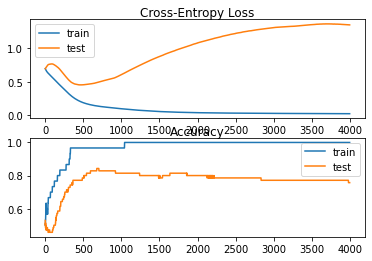

In [10]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

For completeness, we can compare results to a version of the model where activity regularization is applied after the relu activation function.

In [11]:
# mlp overfit on the two circles dataset with activation regularization before activation
from sklearn.datasets import make_circles
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', activity_regularizer=l1(0.0001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.771


Running the example reports the model performance on the train and test datasets.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that, at least on this problem and with this model, activation regularization after the activation function did not improve generalization error; it made it worse.

Reviewing the line plot of train and test accuracy, we see that the model still shows signs of overfitting the training dataset.

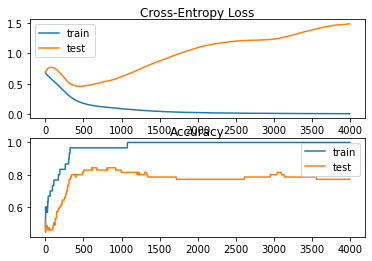

In [12]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

This suggests that it may be worth experimenting with both approaches for implementing activity regularization with your dataset to confirm that you are getting the most out of the method.

## Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.

* **Report Activation Mean**. Update the example to calculate the mean activation of the regularized layer and confirm that indeed the activations have been made more sparse.
* **Grid Search**. Update the example to grid search different values for the regularization hyperparameter.
* **Alternate Norm**. Update the example to evaluate the L2 or L1 and L2 vector norm for regularizing the hidden layer outputs.
* **Repeated Evaluation**. Update the example to fit and evaluate the model multiple times and report the mean and standard deviation of model performance.

## Summary

In this tutorial, you discovered activation regularization as a technique to improve the generalization of learned features. Specifically, you learned:

* Neural networks learn features from data and models, such as autoencoders and encoder-decoder models, and explicitly seek effective learned representations.
* Similar to weights, large values in learned features, e.g., large activations, may indicate an overfit model.
* Adding penalties to the loss function that penalizes a model in proportion to the magnitude of the activations may result in more robust and generalized learned features.